In [4]:
import sys
sys.path.append('.')

import numpy as np

from annotation_ems.gen_dataset import generate_dataset
from annotation_ems.ems_prepare import split, prepare_json
import itertools as it

import subprocess
import os
import time
import random

### begin of config

dataset_path = '/mnt/data/yxchen/gesture-datasets/ems'
output_path = './annotation_ems/'

modality = "rgb"  # d, rgb, rgbd
labels = ['wrist_left', 'wrist_right', 'pronation', 'supination']

In [5]:
data_batch = ['subject01_setting3_bg02_01', \
             '12_3_position2-1', \
             '12_5_position2_with_close_bg_object', \
             '12_6_position2_with_further_bg_object']
#data_batch = [6,5,4,3,2,1]
data_batch.sort()

In [13]:
data_batch

['12_3_position2-1',
 '12_5_position2_with_close_bg_object',
 '12_6_position2_with_further_bg_object',
 'subject01_setting3_bg02_01']

In [6]:
train_ratio = 0
test_ratio = 0
count = 9
expr_name = "27."
model = "27.8"

train_partition = {x: train_ratio for x in data_batch}
test_partition = {x: test_ratio for x in data_batch}
generate_dataset(expr_name=expr_name+str(count), modality=modality, dataset_path=dataset_path, output_path=output_path, train_partition=train_partition, test_partition=test_partition, labels=labels)
prepare_json(csv_dir_path=output_path, expr_name=expr_name+str(count))
print(expr_name+str(count))

count += 1
for dataset in data_batch:
    print(expr_name+str(count))
    train_partition = {dataset: train_ratio }    
    test_partition = {dataset: test_ratio}
    generate_dataset(expr_name=expr_name+str(count), modality=modality, dataset_path=dataset_path, output_path=output_path, train_partition=train_partition, test_partition=test_partition, labels=labels)
    prepare_json(csv_dir_path=output_path, expr_name=expr_name+str(count))
    count += 1

27.9
27.10
27.11
27.12
27.13


In [9]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "%d" % random.randrange(0,4)

import sys
# sys.path.append('../')
os.chdir("/mnt/data/jarvislam1999/Real-time-GesRec/")

from ems_tester import EMSTester

In [14]:
count = 1
tester = EMSTester(root_path='/mnt/data/jarvislam1999/Real-time-GesRec',
          video_path='/mnt/data/yxchen/gesture-datasets/ems',
          annotation_path='annotation_ems/ems%s.json' % (expr_name+str(count)),
          result_path='results/ems%s_test' % (expr_name+str(count)),
          model_path='results/ems%s/save_30.pth' %model)
y_pred, y_true, test_data = tester.test()


Namespace(annotation_path='/mnt/data/jarvislam1999/Real-time-GesRec/annotation_ems/ems1.2.1.json', arch='resnext-101', batch_size=1, begin_epoch=1, checkpoint=1, crop_position_in_test='c', dampening=0.9, dataset='ems', ft_begin_index=0, initial_scale=1.0, learning_rate=0.1, lr_patience=10, lr_steps=[10, 25, 50, 80, 100], manual_seed=1, mean=[114.7748, 107.7354, 99.475], mean_dataset='activitynet', modality='RGB', model='resnext', model_depth=101, momentum=0.9, n_classes=400, n_epochs=200, n_finetune_classes=4, n_scales=5, n_threads=1, n_val_samples=1, nesterov=False, no_cuda=False, no_hflip=False, no_mean_norm=False, no_softmax_in_test=False, no_train=False, no_val=False, norm_value=1, optimizer='sgd', pretrain_path='', resnet_shortcut='B', resnext_cardinality=32, result_path='/mnt/data/jarvislam1999/Real-time-GesRec/results/ems1.2.1_test', resume_path='/mnt/data/jarvislam1999/Real-time-GesRec/results/ems1.1/save_30.pth', root_path='/mnt/data/jarvislam1999/Real-time-GesRec', sample_dur

In [10]:
count = 10

In [11]:
accuracy_list = []

for dataset in data_batch:
    print(expr_name+str(count))
    tester = EMSTester(root_path='/mnt/data/jarvislam1999/Real-time-GesRec',
              video_path='/mnt/data/yxchen/gesture-datasets/ems',
              annotation_path='annotation_ems/ems%s.json' % (expr_name+str(count)),
              result_path='results/ems%s_test' % (expr_name+str(count)),
              model_path='results/ems%s/save_30.pth' %model)
    y_pred, y_true, test_data = tester.test()
    accuracy_list.append(np.sum(np.equal(y_pred, y_true))/len(y_pred)*100)
    count += 1


27.10
Namespace(annotation_path='/mnt/data/jarvislam1999/Real-time-GesRec/annotation_ems/ems27.10.json', arch='resnext-101', batch_size=1, begin_epoch=1, checkpoint=1, crop_position_in_test='c', dampening=0.9, dataset='ems', ft_begin_index=0, initial_scale=1.0, learning_rate=0.1, lr_patience=10, lr_steps=[10, 25, 50, 80, 100], manual_seed=1, mean=[114.7748, 107.7354, 99.475], mean_dataset='activitynet', modality='RGB', model='resnext', model_depth=101, momentum=0.9, n_classes=400, n_epochs=200, n_finetune_classes=4, n_scales=5, n_threads=1, n_val_samples=1, nesterov=False, no_cuda=False, no_hflip=False, no_mean_norm=False, no_softmax_in_test=False, no_train=False, no_val=False, norm_value=1, optimizer='sgd', pretrain_path='', resnet_shortcut='B', resnext_cardinality=32, result_path='/mnt/data/jarvislam1999/Real-time-GesRec/results/ems27.10_test', resume_path='/mnt/data/jarvislam1999/Real-time-GesRec/results/ems27.8/save_30.pth', root_path='/mnt/data/jarvislam1999/Real-time-GesRec', sam

In [12]:
accuracy_list

[32.5, 83.5, 74.5, 92.25]

('subject01_machine_recovery_3gps_2pairs', 'subject01_machine_recovery_3gps_2pairs_03', 'subject01_machine_recovery_3gps_2pairs_04', 'subject01_machine_recovery_3gps_2pairs_05', 'subject01_machine_recovery_3gps_2pairs_06')
[95.477386934673376, -100.0, -100.0, -99.5, -100.0]


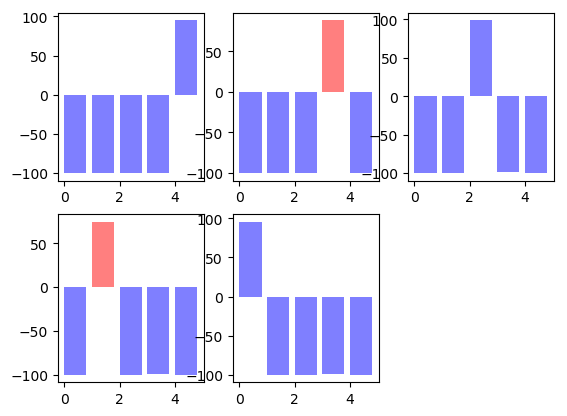

In [165]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = tuple(data_batch)
y_pos = np.arange(len(objects))
performance = accuracy_dict[expr_name_train+'0005']
print(objects)
print(performance)

#plt.subplot(111)
count = 1
for combination in combinations:
    name = '000%d' % count if (count <= 10) else \
        ('00%d' % count if count <=100 else \
        ('0%d' % count if count <= 1000 else \
        ('%d' %count)))
    #objects = tuple([""]*len(objects))
    y_pos = np.arange(len(objects))
    performance = accuracy_dict[expr_name_train+name]
    greater = np.logical_or(np.greater(0, performance),\
                             np.greater(performance, 90))
    color = ["b" if x else "r" for x in greater]
    plt.subplot(len(objects) // 3 + 1,3,count)
    plt.bar(y_pos, performance, align='edge', alpha=0.5,color = color)

    #plt.xticks(y_pos, objects)
    #plt.ylabel('Performance')
    #plt.title('Test data')
    count += 1

plt.show()